## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [38]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [39]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'


In [40]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [41]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [42]:
  # useful for getting number of output classes
folders = glob('C:/Users/Jospin/Documents/DL Project/Malaria Prediction/Dataset/Train/*')

In [43]:
folders

['C:/Users/Jospin/Documents/DL Project/Malaria Prediction/Dataset/Train\\Parasite',
 'C:/Users/Jospin/Documents/DL Project/Malaria Prediction/Dataset/Train\\Uninfected']

In [44]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [45]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [46]:

# view the structure of the model
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [47]:
from tensorflow.keras.layers import MaxPooling2D

In [48]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 64)      

In [49]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [50]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [51]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/Jospin/Documents/DL Project/Malaria Prediction/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [52]:
training_set

In [53]:
test_set = test_datagen.flow_from_directory('C:/Users/Jospin/Documents/DL Project/Malaria Prediction/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [54]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Jospin\AppData\Local\Temp/ipykernel_17852/4130870686.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
13/13 [==============================] - 18s 1s/step - loss: 3.1869 - accuracy: 0.4976 - val_loss: 0.6408 - val_accuracy: 0.6791
Epoch 2/20
13/13 [==============================] - 17s 1s/step - loss: 0.6890 - accuracy: 0.5361 - val_loss: 0.6836 - val_accuracy: 0.5522
Epoch 3/20
13/13 [==============================] - 17s 1s/step - loss: 0.6433 - accuracy: 0.6178 - val_loss: 0.7539 - val_accuracy: 0.3358
Epoch 4/20
13/13 [==============================] - 17s 1s/step - loss: 0.5330 - accuracy: 0.7380 - val_loss: 0.8816 - val_accuracy: 0.2910
Epoch 5/20
13/13 [==============================] - 17s 1s/step - loss: 0.4767 - accuracy: 0.7644 - val_loss: 1.0269 - val_accuracy: 0.6642
Epoch 6/20
13/13 [==============================] - 17s 1s/step - loss: 0.4610 - accuracy: 0.7837 - val_loss: 0.9062 - val_accuracy: 0.3731
Epoch 7/20
13/13 [==============================] - 17s 1s/step - loss: 0.3707 - accuracy: 0.8173 - val_loss: 0.8733 - val_accuracy: 0.4328
Epoch 8/20
13/13 [==

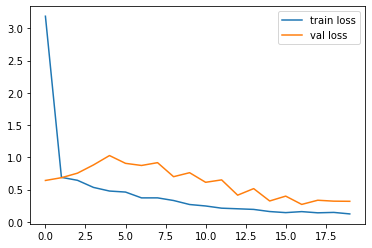

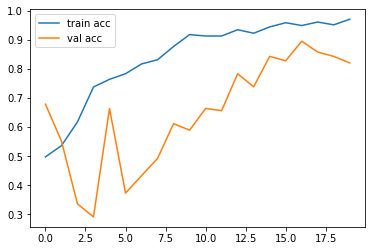

<Figure size 432x288 with 0 Axes>

In [55]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [56]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [57]:

y_pred = model.predict(test_set)


In [58]:
y_pred

array([[9.99909401e-01, 9.05494744e-05],
       [6.35451794e-01, 3.64548206e-01],
       [3.07298422e-01, 6.92701578e-01],
       [8.33385959e-02, 9.16661441e-01],
       [9.99989033e-01, 1.09799812e-05],
       [1.48434997e-01, 8.51565063e-01],
       [9.87892270e-01, 1.21077178e-02],
       [6.00075498e-02, 9.39992428e-01],
       [1.54048994e-01, 8.45951080e-01],
       [9.88138258e-01, 1.18617639e-02],
       [2.20673561e-01, 7.79326439e-01],
       [2.02062860e-01, 7.97937155e-01],
       [7.05127195e-02, 9.29487288e-01],
       [9.99828339e-01, 1.71674154e-04],
       [9.98239875e-01, 1.76015729e-03],
       [9.99397397e-01, 6.02645276e-04],
       [3.87681276e-01, 6.12318695e-01],
       [9.11550581e-01, 8.84494260e-02],
       [5.80349803e-01, 4.19650227e-01],
       [9.97266531e-01, 2.73343152e-03],
       [9.58189964e-01, 4.18100692e-02],
       [9.99453723e-01, 5.46279596e-04],
       [5.24435565e-02, 9.47556436e-01],
       [2.41476446e-01, 7.58523583e-01],
       [4.250639

In [59]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [60]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1], dtype=int64)

In [61]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [62]:
model=load_model('model_vgg19.h5')

In [63]:
img=image.load_img('C:/Users/Jospin/Documents/DL Project/Malaria Prediction/Dataset/Test/Uninfected/2.png',target_size=(224,224))



In [64]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [65]:
x.shape

(224, 224, 3)

In [66]:
x=x/255

In [67]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [68]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [69]:
a=np.argmax(model.predict(img_data), axis=1)

In [70]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
